# DataFrame
Seriesが一列だとすれば、DataFrameは複数の列を持つデータ構造をしています。  
イメージとして、Excelのようなデータ構造をndarrayで保持しているというのが近いと思います。  
一つ一つの要素を書き換えるような手動の処理はExcelの方が素早く出来ますが、一括計算をしたいときはDataFrameの方が遥かに素早く計算できます。

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 辞書型を引数にとり、DataFrameオブジェクトを返す。
df = pd.DataFrame(
    {
        "A": [1, 2, 3, -1],
        "B": ["apple", "orange", "banana", "apple"],
        "C": [False, True, True, True],
    }, index=list("abcd"))
df

,A,B,C
a,1,apple,False
b,2,orange,True
c,3,banana,True
d,-1,apple,True


In [3]:
# DataFrameに含まれるSeriesのnameはcolumnsで参照できる
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [4]:
# columnsをキーワード引数で与える場合、インデックスごとのデータのリストを渡す
df = pd.DataFrame(
    [
        [1, "apple", False],
        [2, "orange", True],
        [3, "banana", True],
        [-1, "apple", True],
    ], columns=["A", "B", "C"])
df

,A,B,C
0,1,apple,False
1,2,orange,True
2,3,banana,True
3,-1,apple,True


In [5]:
# 各軸のdtypeを確認（NumPyのndarrayを保持している！）
df.dtypes

A     int64
B    object
C      bool
dtype: object

In [6]:
# Seriesは属性のように呼び出せる
df.B # または df["B"]

0     apple
1    orange
2    banana
3     apple
Name: B, dtype: object

In [7]:
# 複数の列を抜き出したDataFrameを作る
df[["A", "C"]]

,A,C
0,1,False
1,2,True
2,3,True
3,-1,True


In [8]:
# Series 'C'の値がTrueのものだけをDataFrameとして抜き出す
df[df.C]

,A,B,C
1,2,orange,True
2,3,banana,True
3,-1,apple,True


In [9]:
# Bがappleのものだけを抜き出す
df[df.B == "apple"]

,A,B,C
0,1,apple,False
3,-1,apple,True


In [10]:
# Bがappleかつ、CがTrueのものだけを抜き出す
df[(df.B == "apple") & df.C]

,A,B,C
3,-1,apple,True


In [11]:
# DataFrameへのSeriesの追加はこのようにする
df["D_new"] = df.A ** 2
df

,A,B,C,D_new
0,1,apple,False,1
1,2,orange,True,4
2,3,banana,True,9
3,-1,apple,True,1


In [12]:
# メソッドを呼ぶと列ごとに値を計算する
df.sum()

A                             5
B        appleorangebananaapple
C                             3
D_new                        15
dtype: object

In [15]:
# DataFrameの統計量をまとめて出す
df = pd.DataFrame({"rand": (np.random.rand(1000) - 0.5).cumsum(),
                "randn": np.random.randn(1000).cumsum()})
df.describe()

,rand,randn
count,1000.000000,1000.000000
mean,6.239870,15.054675
std,7.308160,9.873716
min,-4.450950,-4.703236
25%,-0.661747,5.967606
50%,4.438357,16.274990
75%,14.477879,23.738435
max,18.556451,32.633223


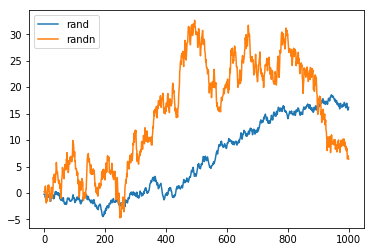

In [16]:
# DataFrameのプロット：何も指定しないと各Seriesを重ねてプロットする
df.plot()
plt.show()

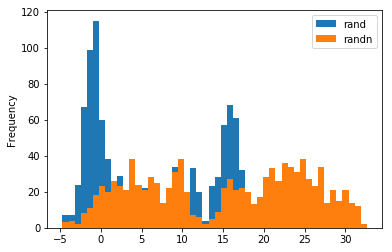

In [17]:
# ヒストグラムなどはkindで指定する。 「df.plot?」を見ると詳細あり。
df.plot(kind="hist", bins=50)